In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

#EDA

In [5]:
train_df.head(2)

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999


In [6]:
train_df.shape, test_df.shape

((290129, 20), (124341, 19))

In [7]:
train_df.describe()

,Unnamed: 0,id,year,odometer,lat,long,price
count,290129.000000,2.901290e+05,290129.000000,2.901290e+05,285726.000000,285726.000000,2.901290e+05
mean,207301.718108,7.311503e+09,2011.359082,9.764241e+04,38.505649,-94.616042,5.193300e+04
std,119595.649164,4.378450e+06,9.149422,2.058970e+05,5.830007,18.319158,9.591680e+06
min,0.000000,7.301583e+09,1900.000000,0.000000e+00,-84.122245,-159.827728,0.000000e+00
25%,103622.000000,7.308154e+09,2008.000000,3.800000e+04,34.600000,-111.924900,5.991000e+03
50%,207440.000000,7.312664e+09,2014.000000,8.561500e+04,39.170000,-88.212494,1.399000e+04
75%,310804.000000,7.315255e+09,2017.000000,1.334360e+05,42.408400,-80.830000,2.650000e+04
max,414469.000000,7.317101e+09,2022.000000,1.000000e+07,82.252826,173.885502,3.736929e+09


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    290129 non-null  int64  
 1   id            290129 non-null  int64  
 2   year          290129 non-null  float64
 3   manufacturer  278787 non-null  object 
 4   model         290129 non-null  object 
 5   condition     174025 non-null  object 
 6   cylinders     170829 non-null  object 
 7   fuel          288676 non-null  object 
 8   odometer      290129 non-null  float64
 9   title_status  285063 non-null  object 
 10  transmission  290129 non-null  object 
 11  drive         202042 non-null  object 
 12  size          82445 non-null   object 
 13  type          227533 non-null  object 
 14  paint_color   203016 non-null  object 
 15  state         290129 non-null  object 
 16  lat           285726 non-null  float64
 17  long          285726 non-null  float64
 18  post

In [9]:
train_df.isnull().sum()

Unnamed: 0           0
id                   0
year                 0
manufacturer     11342
model                0
condition       116104
cylinders       119300
fuel              1453
odometer             0
title_status      5066
transmission         0
drive            88087
size            207684
type             62596
paint_color      87113
state                0
lat               4403
long              4403
posting_date         0
price                0
dtype: int64

In [10]:
train_df.isnull().sum()*100/train_df.shape[0]

Unnamed: 0       0.000000
id               0.000000
year             0.000000
manufacturer     3.909296
model            0.000000
condition       40.018061
cylinders       41.119640
fuel             0.500812
odometer         0.000000
title_status     1.746120
transmission     0.000000
drive           30.361322
size            71.583330
type            21.575230
paint_color     30.025609
state            0.000000
lat              1.517601
long             1.517601
posting_date     0.000000
price            0.000000
dtype: float64

In [11]:
test_df.isnull().sum()*100/test_df.shape[0]

Unnamed: 0       0.000000
id               0.000000
year             0.000000
manufacturer     3.902976
model            0.000000
condition       40.066430
cylinders       41.314611
fuel             0.518735
odometer         0.000000
title_status     1.776566
transmission     0.000000
drive           30.377752
size            71.660997
type            21.568911
paint_color     30.212882
state            0.000000
lat              1.577115
long             1.577115
posting_date     0.000000
dtype: float64

Text(0, 0.5, 'Car count')

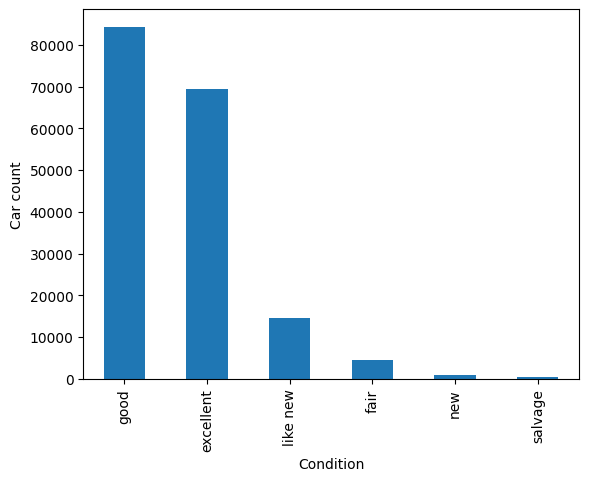

In [12]:
plt = train_df.condition.value_counts().plot(kind='bar')
plt.set_xlabel("Condition")
plt.set_ylabel("Car count")

Text(0, 0.5, 'Car count')

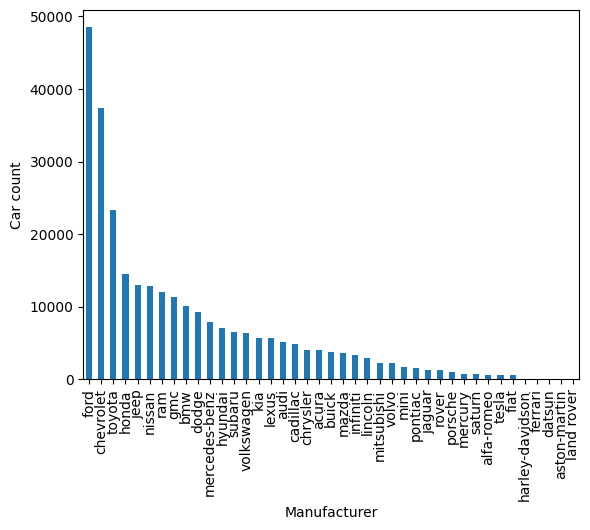

In [13]:
plt = train_df.manufacturer.value_counts().plot(kind='bar')
plt.set_xlabel("Manufacturer")
plt.set_ylabel("Car count")

Text(0, 0.5, 'Car count')

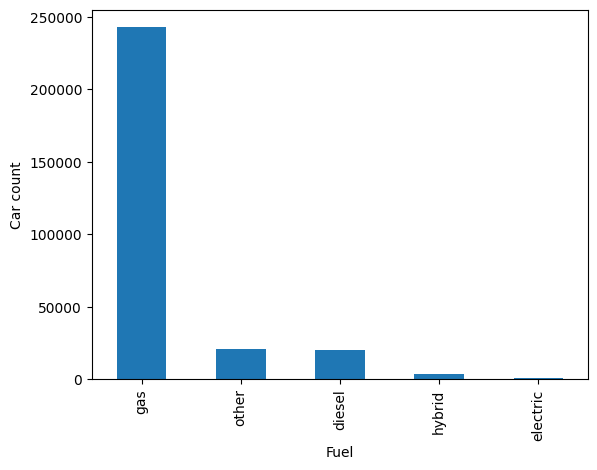

In [14]:
plt = train_df.fuel.value_counts().plot(kind='bar')
plt.set_xlabel("Fuel")
plt.set_ylabel("Car count")

Text(0, 0.5, 'Car count')

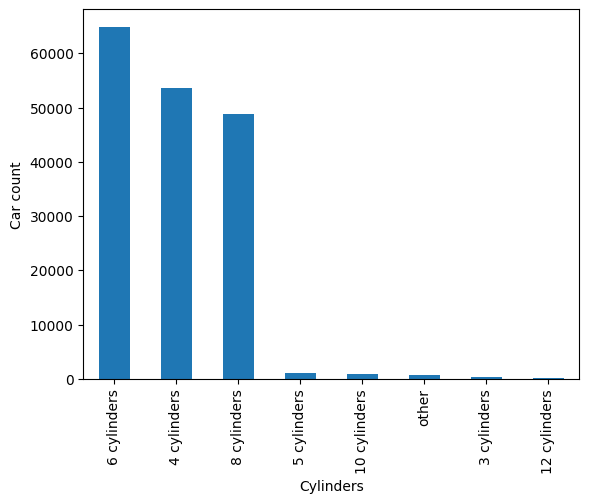

In [15]:
plt = train_df.cylinders.value_counts().plot(kind='bar')
plt.set_xlabel("Cylinders")
plt.set_ylabel("Car count")

Text(0, 0.5, 'Car count')

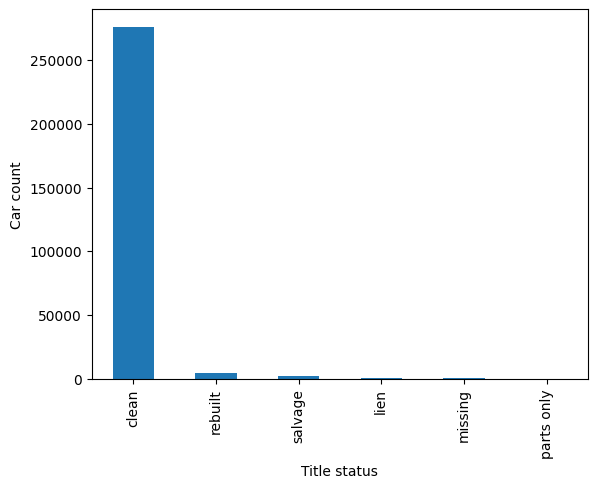

In [16]:
plt = train_df.title_status.value_counts().plot(kind='bar')
plt.set_xlabel("Title status")
plt.set_ylabel("Car count")

Text(0, 0.5, 'Car count')

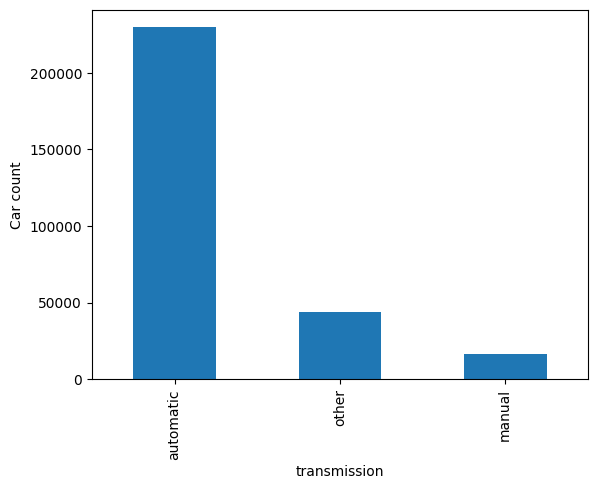

In [17]:
plt = train_df.transmission.value_counts().plot(kind='bar')
plt.set_xlabel("transmission")
plt.set_ylabel("Car count")

Text(0, 0.5, 'Car count')

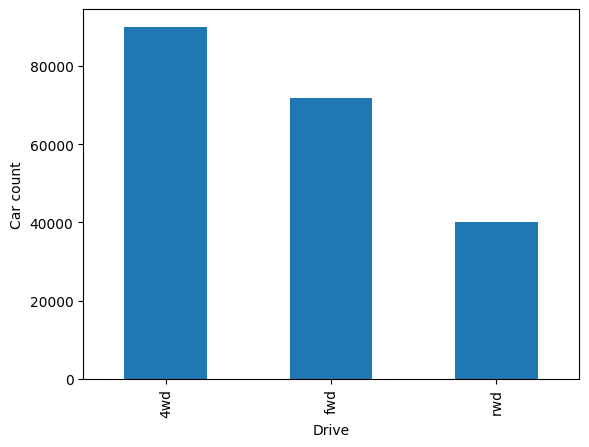

In [18]:
plt = train_df.drive.value_counts().plot(kind='bar')
plt.set_xlabel("Drive")
plt.set_ylabel("Car count")

Text(0, 0.5, 'Car count')

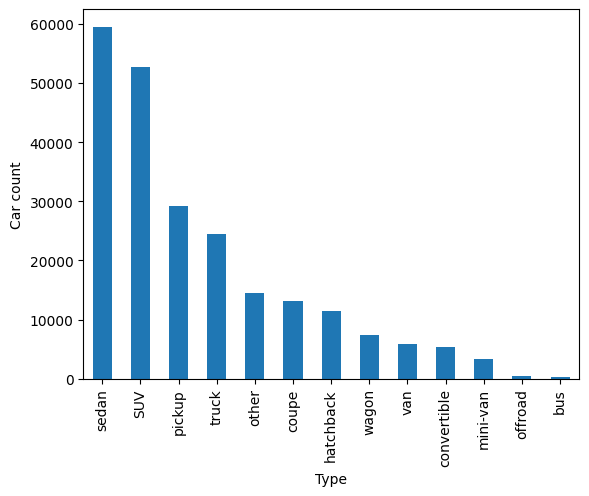

In [19]:
plt = train_df.type.value_counts().plot(kind='bar')
plt.set_xlabel("Type")
plt.set_ylabel("Car count")

Text(0, 0.5, 'Car count')

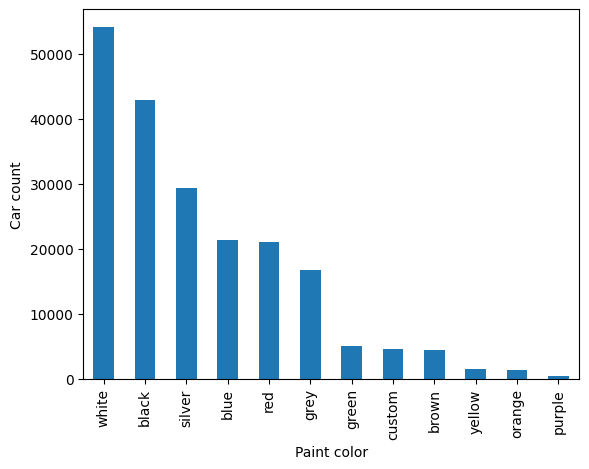

In [20]:
plt = train_df.paint_color.value_counts().plot(kind='bar')
plt.set_xlabel("Paint color")
plt.set_ylabel("Car count")

<Axes: xlabel='fuel', ylabel='count'>

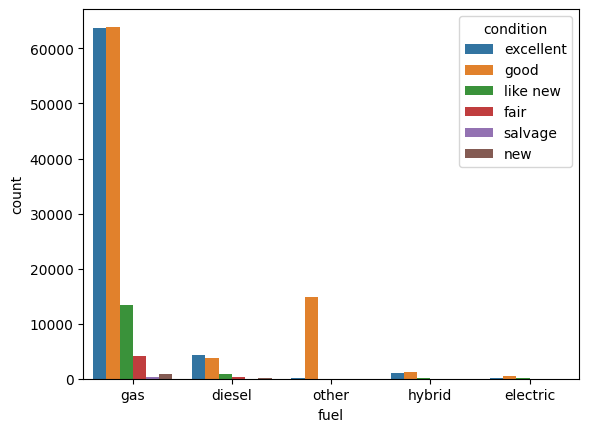

In [21]:
sns.countplot(x='fuel', hue='condition', data=train_df)

<Axes: xlabel='type', ylabel='count'>

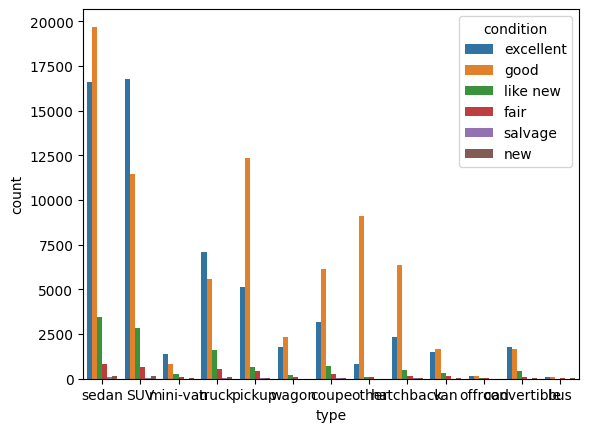

In [22]:
sns.countplot(x='type', hue='condition', data=train_df)

<Axes: xlabel='drive', ylabel='count'>

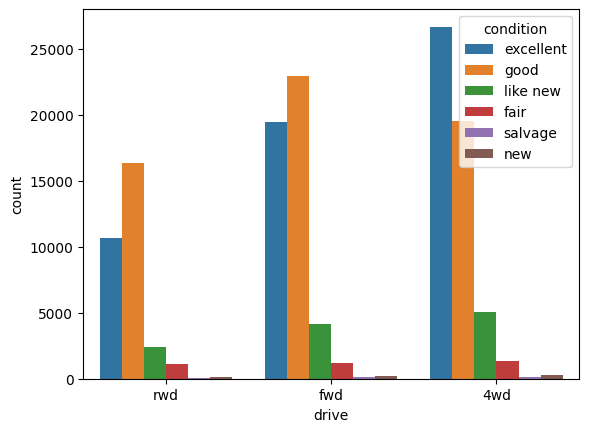

In [23]:
sns.countplot(x='drive', hue='condition', data=train_df)

<Axes: xlabel='paint_color', ylabel='count'>

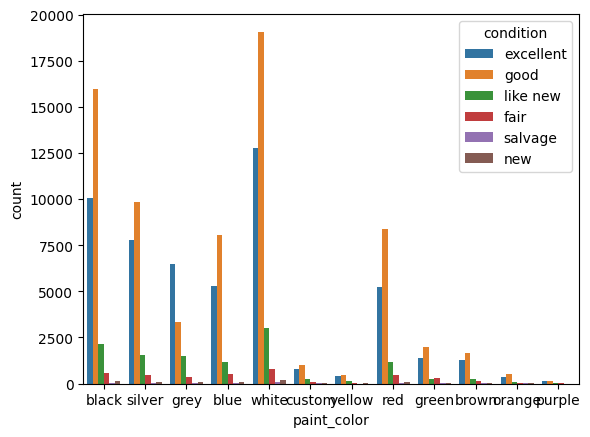

In [24]:
sns.countplot(x='paint_color', hue='condition', data=train_df)

C:\Users\thimi\AppData\Local\Temp\ipykernel_3740\1180135083.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['price'])


<Axes: xlabel='price', ylabel='Density'>

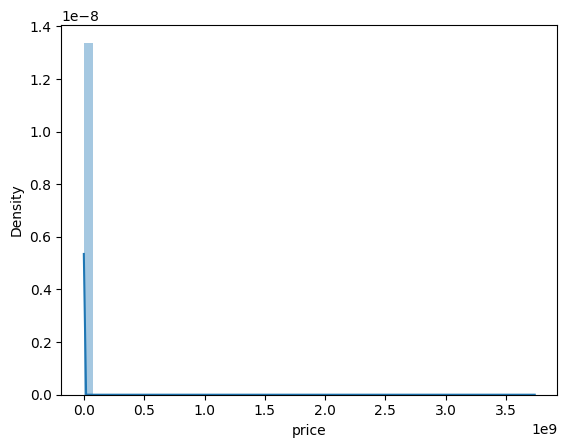

In [25]:
  sns.distplot(train_df['price'])

c:\Users\thimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


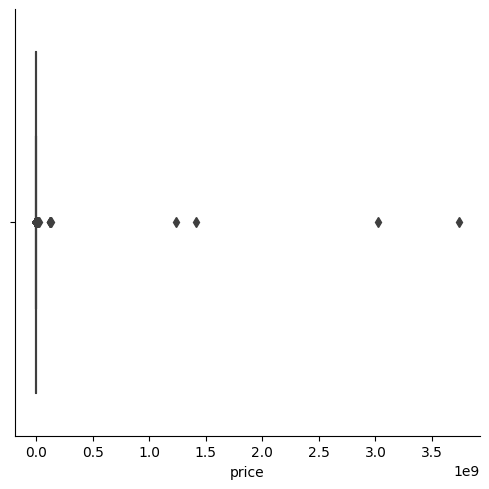

In [26]:
sns.catplot(x='price', data = train_df, kind='box')

C:\Users\thimi\AppData\Local\Temp\ipykernel_3740\2606866551.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['year'])


<Axes: xlabel='year', ylabel='Density'>

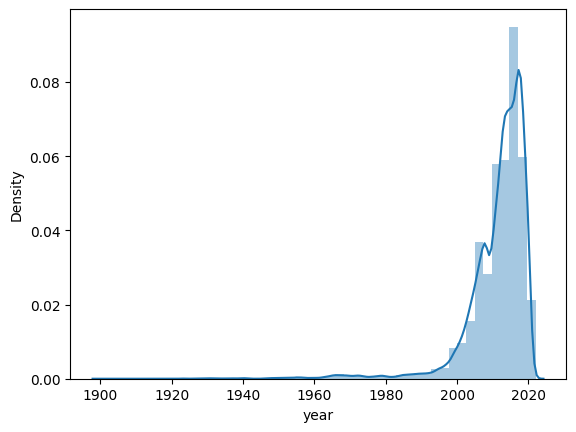

In [27]:
  sns.distplot(train_df['year'])

c:\Users\thimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


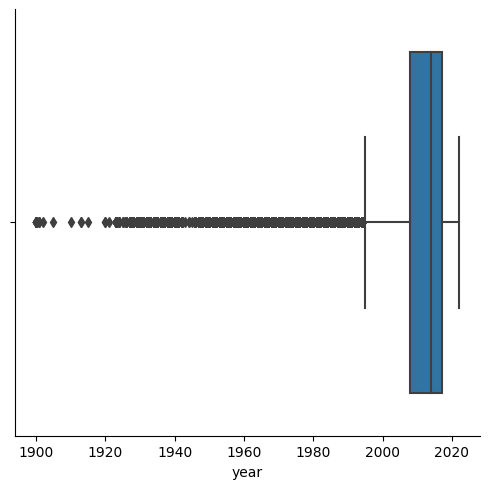

In [28]:
sns.catplot(x='year', data = train_df, kind='box')

C:\Users\thimi\AppData\Local\Temp\ipykernel_3740\1821915205.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['odometer'])


<Axes: xlabel='odometer', ylabel='Density'>

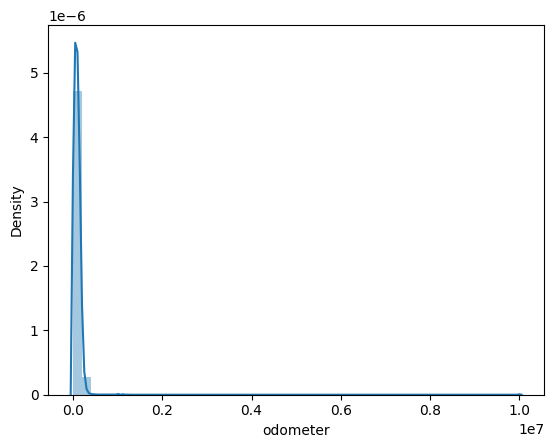

In [29]:
  sns.distplot(train_df['odometer'])

c:\Users\thimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


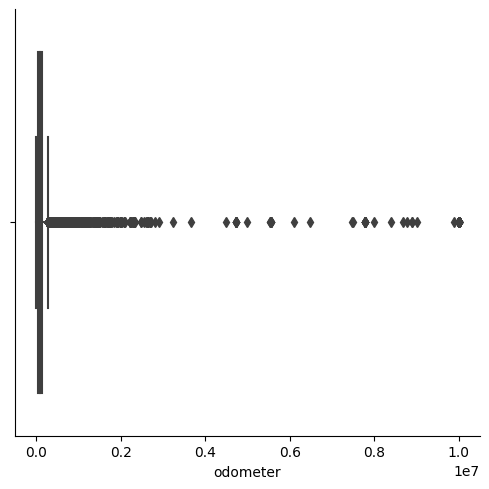

In [30]:
sns.catplot(x='odometer', data = train_df, kind='box')

c:\Users\thimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


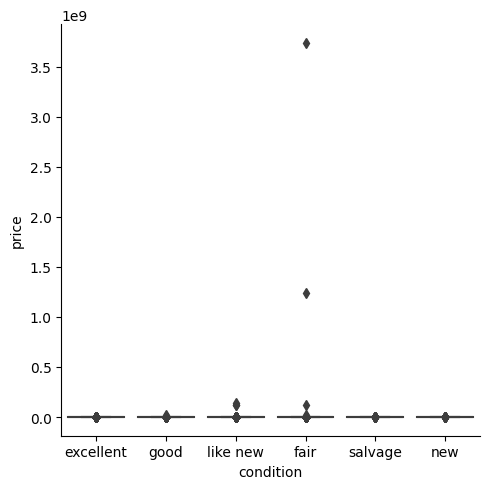

In [31]:
sns.catplot(x='condition', y='price', data = train_df, kind='box')

c:\Users\thimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


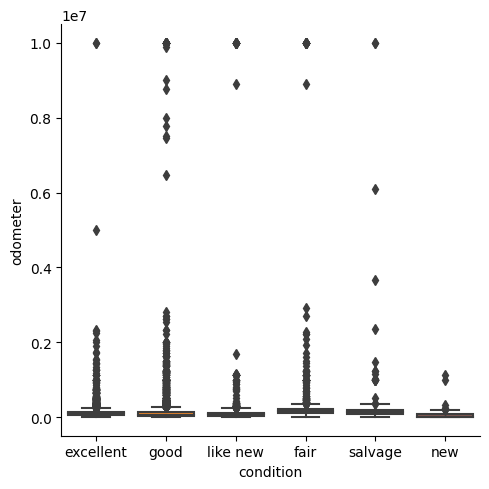

In [32]:
sns.catplot(x='condition', y='odometer', data = train_df, kind='box')

In [33]:
sns.heatmap(train_df.corr(), annot=True)

ValueError: could not convert string to float: 'infiniti'

#PRE-PROCESSING

In [34]:
train_df.head(2)

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999


In [35]:
drop_cols = ['Unnamed: 0', 'id','model', 'state','lat', 'long','size','title_status']
train_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(['Unnamed: 0','model', 'state', 'lat', 'long','size','title_status'], axis=1, inplace=True)

In [36]:
train_df.columns

Index(['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'drive', 'type', 'paint_color', 'posting_date',
       'price'],
      dtype='object')

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          290129 non-null  float64
 1   manufacturer  278787 non-null  object 
 2   condition     174025 non-null  object 
 3   cylinders     170829 non-null  object 
 4   fuel          288676 non-null  object 
 5   odometer      290129 non-null  float64
 6   transmission  290129 non-null  object 
 7   drive         202042 non-null  object 
 8   type          227533 non-null  object 
 9   paint_color   203016 non-null  object 
 10  posting_date  290129 non-null  object 
 11  price         290129 non-null  int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 26.6+ MB


In [38]:
train_df.isnull().sum()

year                 0
manufacturer     11342
condition       116104
cylinders       119300
fuel              1453
odometer             0
transmission         0
drive            88087
type             62596
paint_color      87113
posting_date         0
price                0
dtype: int64

In [39]:
manufacturer_mode= train_df['manufacturer'].mode()[0]
condition_mode = train_df['condition'].mode()[0]
cylinders_mode = train_df['cylinders'].mode()[0]
fuel_mode = train_df['fuel'].mode()[0]
drive_mode = train_df['drive'].mode()[0]
type_mode = train_df['type'].mode()[0]
paint_color_mode = train_df['paint_color'].mode()[0]


train_df['manufacturer'].fillna(manufacturer_mode, inplace=True)
train_df['condition'].fillna(condition_mode, inplace=True)
train_df['cylinders'].fillna(cylinders_mode, inplace=True)
train_df['fuel'].fillna(fuel_mode, inplace=True)
train_df['drive'].fillna(drive_mode, inplace=True)
train_df['type'].fillna(type_mode, inplace=True)
train_df['paint_color'].fillna(paint_color_mode, inplace=True)


test_df['manufacturer'].fillna(manufacturer_mode, inplace=True)
test_df['condition'].fillna(condition_mode, inplace=True)
test_df['cylinders'].fillna(cylinders_mode, inplace=True)
test_df['fuel'].fillna(fuel_mode, inplace=True)
test_df['drive'].fillna(drive_mode, inplace=True)
test_df['type'].fillna(type_mode, inplace=True)
test_df['paint_color'].fillna(paint_color_mode, inplace=True)

In [40]:
train_df.isnull().sum()

year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
posting_date    0
price           0
dtype: int64

In [41]:
train_df['posting_date'] = train_df['posting_date'].str[:4]
train_df['posting_date'] = pd.to_numeric(train_df['posting_date'], errors='coerce').astype('Int64')

test_df['posting_date'] = test_df['posting_date'].str[:4]
test_df['posting_date'] = pd.to_numeric(test_df['posting_date'], errors='coerce').astype('Int64')

train_df['year']=train_df['year'].astype(int)

test_df['year']=test_df['year'].astype(int)


train_df['Age']=train_df['posting_date']-train_df['year']

test_df['Age']=test_df['posting_date']-test_df['year']

drop_cols = ['posting_date']
train_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(['posting_date'], axis=1, inplace=True)

In [42]:
train_df.head(2)

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,price,Age
0,2007,infiniti,excellent,6 cylinders,gas,214740.0,automatic,rwd,sedan,black,7995,14
1,2008,cadillac,good,6 cylinders,gas,170276.0,automatic,4wd,SUV,black,14999,13


In [43]:
train_df.shape, test_df.shape

((290129, 12), (124341, 12))

In [44]:
(train_df['price'] == 0).sum()

21144

In [45]:
train_df=train_df.drop(train_df[train_df['price'] == 0].index)

In [46]:
train_df.shape, test_df.shape

((268985, 12), (124341, 12))

C:\Users\thimi\AppData\Local\Temp\ipykernel_3740\2951157067.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

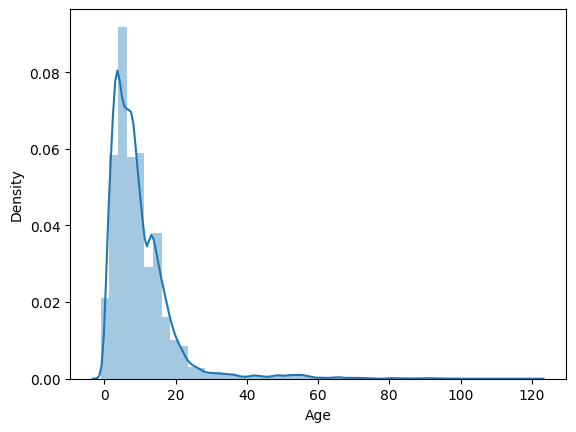

In [47]:
sns.distplot(train_df['Age'])

c:\Users\thimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


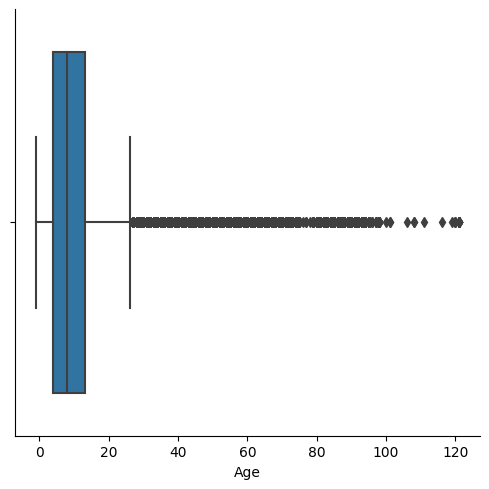

In [48]:
sns.catplot(x='Age', data = train_df, kind='box')

c:\Users\thimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


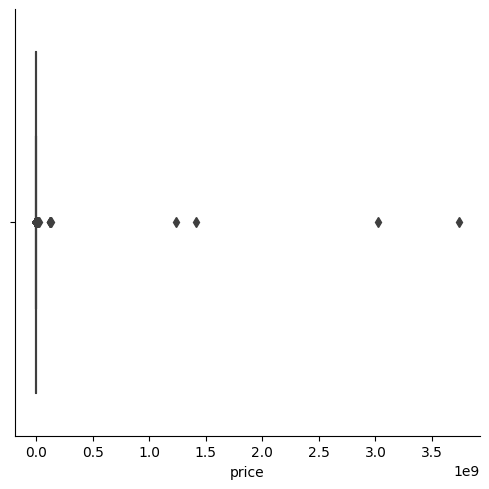

In [49]:
sns.catplot(x='price', data = train_df, kind='box')

In [50]:
q1 = train_df['price'].quantile(0.25)
q3 = train_df['price'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.25*iqr
ll = q1 - 1.5*iqr

train_df = train_df[((train_df.price >= ll) &
                     (train_df.price <= ul))]
max_price_train = train_df['price'].max()
min_price_train = train_df['price'].min()

def cap_price(price):
    if price >= max_price_train:
        return max_price_train
    if price <= min_price_train:
        return min_price_train
    return price

In [51]:
train_df.shape

(261961, 12)

c:\Users\thimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


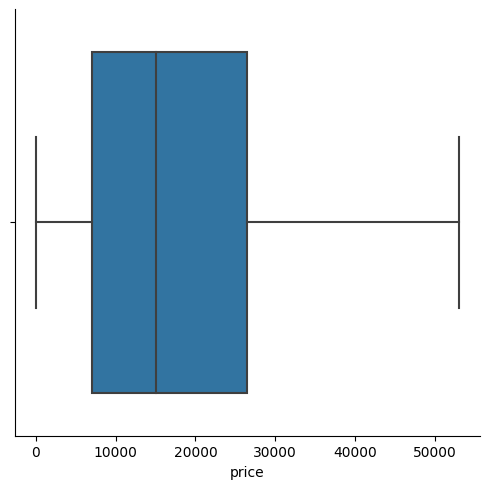

In [52]:
sns.catplot(x='price', data = train_df, kind='box')

c:\Users\thimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


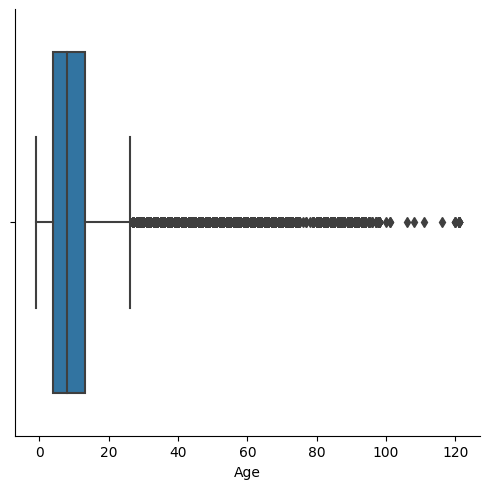

In [53]:
sns.catplot(x='Age', data = train_df, kind='box')

In [54]:
q1 = train_df['Age'].quantile(0.25)
q3 = train_df['Age'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.30*iqr
ll = q1 - 1.5*iqr

train_df = train_df[((train_df.Age >= ll) &
                     (train_df.Age <= ul))]
max_Age_train = train_df['Age'].max()
min_Age_train = train_df['Age'].min()

def cap_Age(Age):
    if Age >= max_Age_train:
        return max_Age_train
    if Age <= min_Age_train:
        return min_Age_train
    return Age

In [55]:
train_df.shape

(250522, 12)

c:\Users\thimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


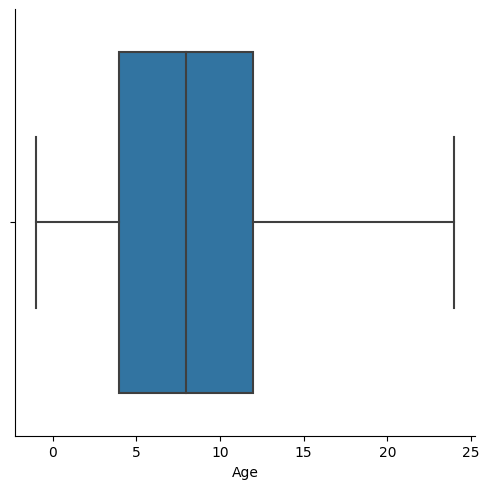

In [56]:
sns.catplot(x='Age', data = train_df, kind='box')

c:\Users\thimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


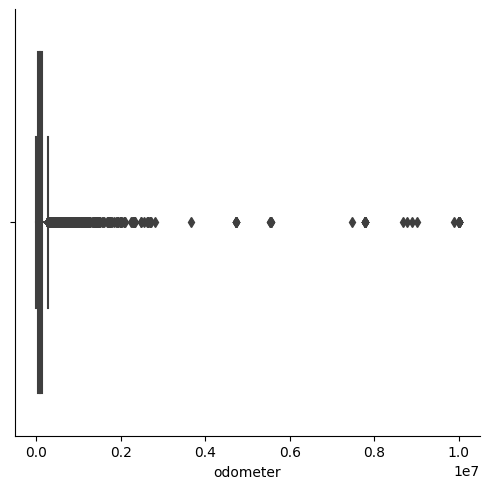

In [57]:
sns.catplot(x='odometer', data = train_df, kind='box')

In [58]:
q1 = train_df['odometer'].quantile(0.25)
q3 = train_df['odometer'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.45*iqr
ll = q1 - 1.5*iqr

train_df = train_df[((train_df.odometer >= ll) &
                     (train_df.odometer <= ul))]
max_odometer_train = train_df['odometer'].max()
min_odometer_train = train_df['odometer'].min()

def cap_odometer(odometer):
    if odometer >= max_odometer_train:
        return max_odometer_train
    if odometer <= min_odometer_train:
        return min_odometer_train
    return odometer

In [59]:
train_df.shape

(248312, 12)

In [60]:
test_df.head(2)

,id,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,Age
0,7313399730,2018,honda,good,4 cylinders,gas,28898.0,automatic,fwd,sedan,white,3
1,7308035814,2017,cadillac,good,6 cylinders,gas,41147.0,other,4wd,sedan,red,4


c:\Users\thimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


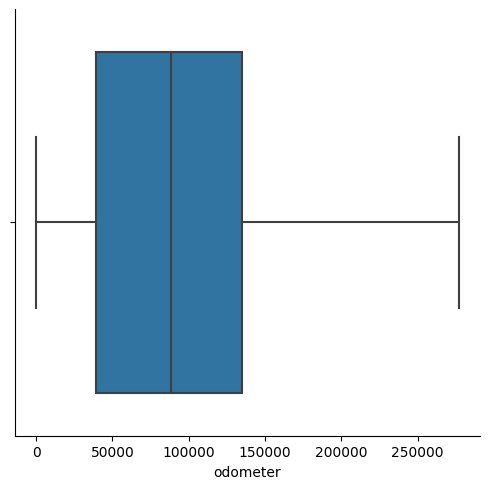

In [61]:
sns.catplot(x='odometer', data = train_df, kind='box')

In [62]:
train_df['fuel'] = train_df['fuel'].map({'gas': 0, 'diesel': 1, 'hybrid':2, 'electric':3, 'other':4})
train_df['condition'] = train_df['condition'].map({'excellent': 1, 'good': 2, 'like new':3, 'fair':4, 'new':5, 'salvage':6})
train_df['cylinders'] = train_df['cylinders'].map({'6 cylinders': 6, '4 cylinders': 4, '8 cylinders':8, '10 cylinders':10, '5 cylinders':5, 'other':9, '3 cylinders':3, '12 cylinders':12})
train_df['transmission'] = train_df['transmission'].map({'automatic': 0, 'manual': 1, 'other':2})
train_df['drive'] = train_df['drive'].map({'4wd': 0, 'fwd': 1, 'rwd':2})
train_df['paint_color'] = train_df['paint_color'].map({'white': 0, 'black': 1, 'silver':2, 'blue':3, 'red':4, 'grey':5, 'green':6, 'custom':7, 'brown':8, 'yellow':9, 'orange':10, 'purple':11})
train_df['type'] = train_df['type'].map({'sedan': 0, 'SUV': 1, 'pickup':2, 'truck':3, 'other':4, 'coupe':5, 'hatchback':6, 'wagon':7, 'van':8, 'convertible':9, 'mini-van':10, 'offroad':11, 'bus':12})
train_df['manufacturer'] = train_df['manufacturer'].map({'ford':1, 'chevrolet':2, 'toyota':3, 'honda':4, 'jeep':5, 'nissan':6, 'ram':7, 'gmc':8, 'bmw':9, 'dodge':10, 'mercedes-benz':11, 'hyundai':12, 'subaru':13, 'volkswagen':14, 'kia':15, 'lexus':16, 'audi':17, 'cadillac':18, 'chrysler':19, 'acura':20, 'buick':21, 'mazda':22, 'infiniti':23, 'lincoln':24, 'mitsubishi':25, 'volvo':26, 'mini':27, 'pontiac':28, 'jaguar':29, 'rover':29, 'porsche':30, 'mercury':31, 'saturn':32, 'alfa-romeo':33, 'tesla':34, 'fiat':35, 'harley-davidson':36, 'ferrari':37, 'datsun':38, 'aston-martin':39, 'land rover':40})


test_df['fuel'] = test_df['fuel'].map({'gas': 0, 'diesel': 1, 'hybrid':2, 'electric':3, 'other':4})
test_df['condition'] = test_df['condition'].map({'excellent': 1, 'good': 2, 'like new':3, 'fair':4, 'new':5, 'salvage':6})
test_df['cylinders'] = test_df['cylinders'].map({'6 cylinders': 6, '4 cylinders': 4, '8 cylinders':8, '10 cylinders':10, '5 cylinders':5, 'other':9, '3 cylinders':3, '12 cylinders':12})
test_df['transmission'] = test_df['transmission'].map({'automatic': 0, 'manual': 1, 'other':2})
test_df['drive'] = test_df['drive'].map({'4wd': 0, 'fwd': 1, 'rwd':2})
test_df['paint_color'] = test_df['paint_color'].map({'white': 0, 'black': 1, 'silver':2, 'blue':3, 'red':4, 'grey':5, 'green':6, 'custom':7, 'brown':8, 'yellow':9, 'orange':10, 'purple':11})
test_df['type'] = test_df['type'].map({'sedan': 0, 'SUV': 1, 'pickup':2, 'truck':3, 'other':4, 'coupe':5, 'hatchback':6, 'wagon':7, 'van':8, 'convertible':9, 'mini-van':10, 'offroad':11, 'bus':12})
test_df['manufacturer'] = test_df['manufacturer'].map({'ford':1, 'chevrolet':2, 'toyota':3, 'honda':4, 'jeep':5, 'nissan':6, 'ram':7, 'gmc':8, 'bmw':9, 'dodge':10, 'mercedes-benz':11, 'hyundai':12, 'subaru':13, 'volkswagen':14, 'kia':15, 'lexus':16, 'audi':17, 'cadillac':18, 'chrysler':19, 'acura':20, 'buick':21, 'mazda':22, 'infiniti':23, 'lincoln':24, 'mitsubishi':25, 'volvo':26, 'mini':27, 'pontiac':28, 'jaguar':29, 'rover':29, 'porsche':30, 'mercury':31, 'saturn':32, 'alfa-romeo':33, 'tesla':34, 'fiat':35, 'harley-davidson':36, 'ferrari':37, 'datsun':38, 'aston-martin':39, 'land rover':40})


C:\Users\thimi\AppData\Local\Temp\ipykernel_3740\1280448585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['fuel'] = train_df['fuel'].map({'gas': 0, 'diesel': 1, 'hybrid':2, 'electric':3, 'other':4})
C:\Users\thimi\AppData\Local\Temp\ipykernel_3740\1280448585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['condition'] = train_df['condition'].map({'excellent': 1, 'good': 2, 'like new':3, 'fair':4, 'new':5, 'salvage':6})
C:\Users\thimi\AppData\Local\Temp\ipykernel_3740\1280448585.p

In [63]:
test_df.head(2)

,id,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,Age
0,7313399730,2018,4,2,4,0,28898.0,0,1,0,0,3
1,7308035814,2017,18,2,6,0,41147.0,2,0,0,4,4


<Axes: >

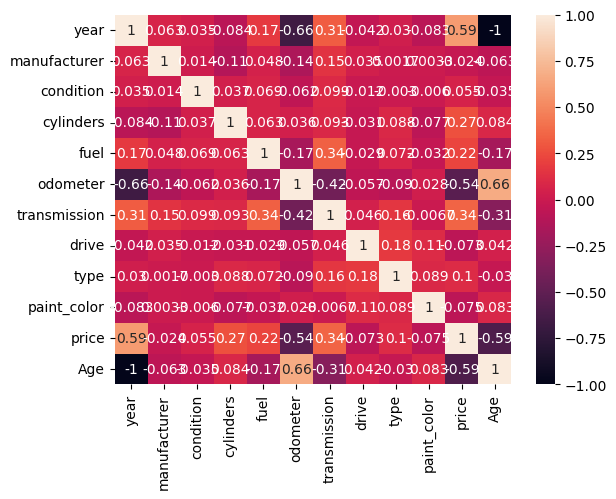

In [64]:
sns.heatmap(train_df.corr(), annot=True)

In [65]:
train_df['odometer']=train_df['odometer'].astype(int)
test_df['odometer']=test_df['odometer'].astype(int)

C:\Users\thimi\AppData\Local\Temp\ipykernel_3740\1823400320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['odometer']=train_df['odometer'].astype(int)


In [66]:
drop_cols = ['Age']
train_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(['Age'], axis=1, inplace=True)

C:\Users\thimi\AppData\Local\Temp\ipykernel_3740\525578456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(drop_cols, axis=1, inplace=True)


In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248312 entries, 0 to 290128
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   year          248312 non-null  int32
 1   manufacturer  248312 non-null  int64
 2   condition     248312 non-null  int64
 3   cylinders     248312 non-null  int64
 4   fuel          248312 non-null  int64
 5   odometer      248312 non-null  int32
 6   transmission  248312 non-null  int64
 7   drive         248312 non-null  int64
 8   type          248312 non-null  int64
 9   paint_color   248312 non-null  int64
 10  price         248312 non-null  int64
dtypes: int32(2), int64(9)
memory usage: 20.8 MB


#ML MODELS

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = train_df.drop(['price'],axis=1)
Y = train_df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=123)


RF_rg = RandomForestRegressor()

RF_rg.fit(X_train, Y_train)

predictions = RF_rg.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(Y_test, predictions)
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 22110134.576722994
R-squared (R2) Score: 0.8576653966985275


In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = train_df.drop(['price'],axis=1)
Y = train_df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=123)


DT_rg = DecisionTreeRegressor()

DT_rg.fit(X_train, Y_train)

predictions = DT_rg.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(Y_test, predictions)
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 37649668.74671553
R-squared (R2) Score: 0.7576292153763158


In [71]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = train_df.drop(['price'],axis=1)
Y = train_df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=123)


XGB_rg = xgb.XGBRegressor()

XGB_rg.fit(X_train, Y_train)

predictions = XGB_rg.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(Y_test, predictions)
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 35124434.3688896
R-squared (R2) Score: 0.7738854815769518


In [72]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_regression(model, X_test, Y_test):
    y_pred = model.predict(X_test)

    mse = mean_squared_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)

    print("Regression Report")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R²):", r2)
    print("================================================================")

In [73]:
models = {
    "RF": RF_rg,
    "DT": DT_rg,
    "XGB": XGB_rg
}
for name, model in models.items():
    print(name)
    model.fit(X_train, Y_train)
    #tuning
    evaluate_regression(model, X_test, Y_test)

RF
Regression Report
Mean Squared Error (MSE): 22177851.439677857
R-squared (R²): 0.8572294675189898
DT
Regression Report
Mean Squared Error (MSE): 37364870.07143931
R-squared (R²): 0.7594626147310579
XGB
Regression Report
Mean Squared Error (MSE): 35124434.3688896
R-squared (R²): 0.7738854815769518


#CREATE FINAL MODEL BASED ON HIGHEST R2 SCORE & LOWEST MSE


In [74]:
#from sklearn.model_selection import GridSearchCV

#parameters = {'n_estimators' :[10, 50, 100]}

#grid_obj = GridSearchCV(estimator=RF_rg, param_grid=parameters)

#grid_fit = grid_obj.fit(X_train,Y_train)

#final_model = grid_fit.best_estimator_
#final_model

In [75]:
#final_model.score(X_test, Y_test)

In [76]:
final_model = RandomForestRegressor()
final_model.fit(X_train, Y_train)

RandomForestRegressor()

#PREDICTION

In [77]:
pred = final_model.predict(test_df.drop(['id'], axis=1))

In [78]:
test_df['price'] = pred

In [79]:
submission = test_df[['id', 'price']]

In [80]:
submission.to_csv("submissionlast.csv", index=False)

#SAVE THE MODEL

In [81]:
import pickle

In [83]:
pickle.dump(final_model, open("RF_my_carmodel.pkl","wb"))

#LOAD MODEL

In [85]:
loaded_model=pickle.load(open("RF_my_carmodel.pkl","rb"))